Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
x = np.array(ct.fit_transform(X))

In [10]:
x

array([[1.0, 0.0, 1.0, ..., 0.0, 23, 25.355],
       [0.0, 1.0, 0.0, ..., 0.0, 47, 13.093],
       [0.0, 1.0, 0.0, ..., 0.0, 47, 10.114],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 52, 9.894],
       [0.0, 1.0, 0.0, ..., 1.0, 23, 14.02],
       [1.0, 0.0, 0.0, ..., 1.0, 40, 11.349]], dtype=object)

In [11]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [12]:
X_train

array([[1.0, 0.0, 0.0, ..., 1.0, 32, 10.84],
       [0.0, 1.0, 0.0, ..., 0.0, 52, 9.894],
       [1.0, 0.0, 0.0, ..., 1.0, 39, 9.709],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, 29, 29.45],
       [1.0, 0.0, 0.0, ..., 0.0, 67, 15.891],
       [1.0, 0.0, 0.0, ..., 0.0, 28, 13.127]], dtype=object)

In [13]:
X_test

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 36, 11.424],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16, 15.516],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 18, 8.75],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 59, 10.444],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 47, 33.542],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 51, 18.295],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 18, 24.276],
       [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 28, 12.879],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 42, 12.766],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 66, 8.107],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 29, 12.856],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 20, 11.686],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 38, 18.295],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 19, 13.313],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 70, 9.849],
       [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 25, 19.011],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 65, 11.34],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 55, 7.261]

In [14]:
from sklearn.tree import  DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(y_test, y_pred)

In [17]:
sc

1.0

In [18]:
from sklearn.tree import plot_tree

[Text(0.625, 0.9, 'x[8] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[3] <= 0.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.375, 0.3, 'x[6] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.75, 0.5, 'x[7] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

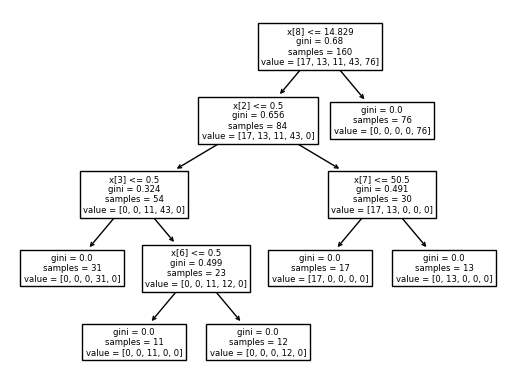

In [19]:
plot_tree(clf)

In [22]:
print(clf.predict([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 36, 11.424]]))

['drugX']
